In [1]:
from chatterjee import chatt
from chatterjee import chatt_table
import pandas as pd
import math
import random as rnd
from matplotlib import pyplot as plt
import seaborn as sns

COSINE:


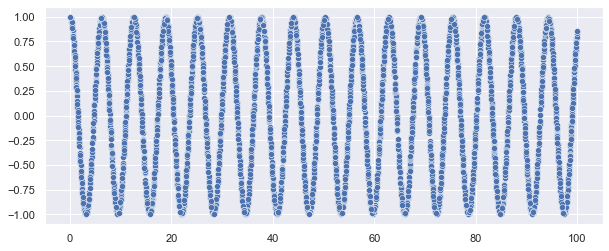

,PEARSON,SPEARMAN,KENDALL,CHATTERJEE1,CHATTERJEE2
0,-0.014839,-0.016128,-0.010963,0.990642,0.008846


TANGENT:


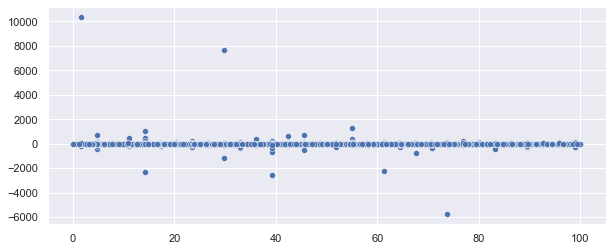

,PEARSON,SPEARMAN,KENDALL,CHATTERJEE1,CHATTERJEE2
0,-0.017882,-0.017968,-0.001718,0.980864,0.015547


LOGATRITHM:


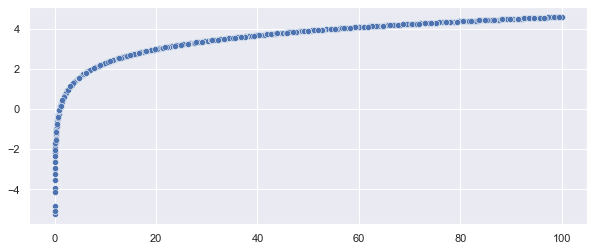

,PEARSON,SPEARMAN,KENDALL,CHATTERJEE1,CHATTERJEE2
0,0.860238,0.999983,0.997519,0.999495,0.994487


REVERSED SQUARE:


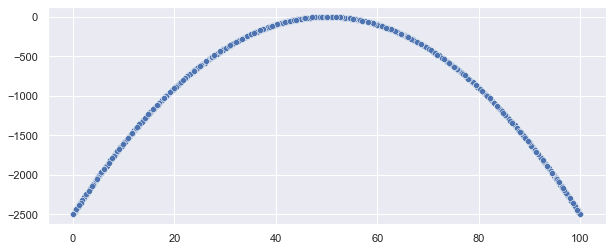

,PEARSON,SPEARMAN,KENDALL,CHATTERJEE1,CHATTERJEE2
0,0.009211,0.008629,0.005664,0.999209,0.247285


RANDOM:


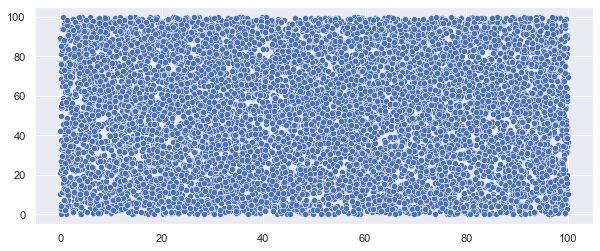

,PEARSON,SPEARMAN,KENDALL,CHATTERJEE1,CHATTERJEE2
0,-0.010482,-0.010876,-0.007306,0.006095,0.001643


In [2]:
rnd.seed = 2007
sns.set(rc={'figure.figsize':(10, 4)})

X = [round(rnd.uniform(0, 100), 4) for _ in range(10000)]

Y_cos  = [round(math.cos(a), 2) for a in X]
Y_tan  = [round(math.tan(a), 2) for a in X]
Y_log  = [round(math.log(a), 2) for a in X]

Y_sqr  = [round(math.pow(a-50, 2)*-1, 2) for a in X]

Y_rnd = [round(rnd.uniform(0, 100), 4) for _ in range(10000)]

dict_pd = {'X': X, 'Y_cos': Y_cos, 'Y_tan': Y_tan, 'Y_log': Y_log, 'Y_sqr': Y_sqr, 'Y_rnd': Y_rnd}
df_vars = pd.DataFrame(dict_pd)

df_corr = pd.DataFrame()

list_of_Ys = [Y_cos, Y_tan, Y_log, Y_sqr, Y_rnd]
list_print = ['COSINE:', 'TANGENT:', 'LOGATRITHM:', 'REVERSED SQUARE:', 'RANDOM:']

for idx, Y in enumerate(list_of_Ys):
    
    print(list_print[idx])

    sns.scatterplot(x=X, y=Y)
    plt.show()

    dict_pd = {'X': X, 'Y': Y}
    df = pd.DataFrame(dict_pd)

    df_corr_dict = {}

    df_corr_dict['PEARSON'] = [df['X'].corr(df['Y'])]
    df_corr_dict['SPEARMAN'] = [df['X'].corr(df['Y'], method = 'spearman')]
    df_corr_dict['KENDALL'] = [df['X'].corr(df['Y'], method = 'kendall')]

    df_corr_dict['CHATTERJEE1'] = chatt(df['X'], df['Y'])
    df_corr_dict['CHATTERJEE2'] = chatt(df['Y'], df['X'])

    df_corr = pd.DataFrame(df_corr_dict)

    display(df_corr)

Tabela korelacji Spearmana


,X,Y_cos,Y_tan,Y_log,Y_sqr,Y_rnd
X,1.000000,-0.016128,-0.017968,0.999983,0.008629,-0.010876
Y_cos,-0.016128,1.000000,0.001716,-0.016106,0.008650,-0.001777
Y_tan,-0.017968,0.001716,1.000000,-0.018083,-0.003492,-0.001179
Y_log,0.999983,-0.016106,-0.018083,1.000000,0.008679,-0.010934
Y_sqr,0.008629,0.008650,-0.003492,0.008679,1.000000,-0.008531
Y_rnd,-0.010876,-0.001777,-0.001179,-0.010934,-0.008531,1.000000


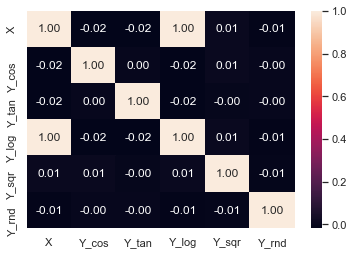



Tabela korelacji Chatterjee


,X,Y_cos,Y_tan,Y_log,Y_sqr,Y_rnd
X,1.000000,0.008846,0.015547,0.994487,0.247285,0.001643
Y_cos,0.990642,1.000000,0.267121,0.846947,0.765214,0.003100
Y_tan,0.980864,0.239224,1.000000,0.721427,0.458603,-0.005542
Y_log,0.999495,0.008715,0.015548,1.000000,0.247415,0.001675
Y_sqr,0.999209,0.011727,0.014759,0.989391,1.000000,0.000544
Y_rnd,0.006095,-0.005703,-0.002911,-0.007705,0.002766,1.000000


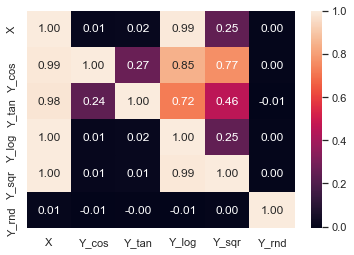

In [4]:
print('Tabela korelacji Spearmana')

display(df_vars.corr(method='spearman'))

sns.set(rc={'figure.figsize':(6, 4)})
sns.heatmap(df_vars.corr(method='spearman'), annot=True, fmt=".2f")
plt.show()


print('') # to pewnie moznaby napisać bardziej elegancko...
print('')
print('Tabela korelacji Chatterjee')

df_corr_chatt = chatt_table(df_vars)
display(df_corr_chatt)

sns.set(rc={'figure.figsize':(6, 4)})
sns.heatmap(df_corr_chatt, annot=True, fmt=".2f")
plt.show()
